# Sentiment Analysis - Restaurant Reviews - NLP Case study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importing & inspecting data 

In [5]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Portfolio Projects\Python Projects\restaurant_reviews.tsv" , sep="\t")

In [6]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Exploring data

In [8]:
data["Liked"].value_counts() # we name this type of data highly balanced data 

1    500
0    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

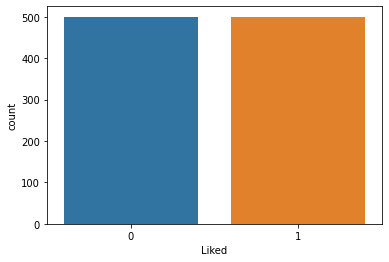

In [9]:
sns.countplot(x=data["Liked"])

In [15]:
data['Review'].apply(len).max()

149

In [14]:
data["Reveiw Letter Count"] =data['Review'].apply(len)

In [16]:
data

,Review,Liked,Reveiw Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [19]:
data.iloc[data["Reveiw Letter Count"].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

### Pre-processing Data (NLTK Text Data Cleaning)

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
corpus =[]
for i in range(len(data)):
    s = re.sub('[^a-zA-Z]', ' ',data['Review'][i])
    s = s.lower()
    s = s.split()
    s =[word for word in s if word not in stop ]
    s = ' '.join(s)
    s = " ".join(lemma.lemmatize(word) for word in s.split())
    corpus.append(s)

corpus


#Removing stopwords and Punctuation, Tokenization = splitting stemming lemmatization (not stemming)

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like burge

In [21]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

#Vectorization

In [50]:
cv.fit_transform(corpus).toarray().shape
#1766 features #Multi dimensional data

(1000, 1766)

In [51]:
y = data['Liked']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
X.shape


(1000, 1766)

In [55]:
y.shape

(1000,)

### Model Training and Building

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [78]:
clf = MultinomialNB ()
model = LinearSVC()

In [79]:
clf.fit(X_train, y_train)
model.fit(X_train, y_train)


LinearSVC()

### Model Prediction 

In [80]:
y_pred1= clf.predict(X_test)
y_pred1

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [70]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [81]:
y_pred2= model.predict(X_test)


### Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [82]:
print(confusion_matrix(y_test, y_pred1))

[[127  46]
 [ 34 123]]


In [83]:
print(confusion_matrix(y_test, y_pred2))

[[132  41]
 [ 37 120]]


In [84]:
print(accuracy_score(y_test, y_pred1))

0.7575757575757576


In [85]:
print(accuracy_score(y_test, y_pred2))

0.7636363636363637


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       173
           1       0.73      0.78      0.75       157

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



#### We will choose the best accuracy score, and for that reason, it turns out that the model LinearSVC is the top model to deploy 

### Model Deployment and Production

In [87]:
import joblib

In [88]:
joblib.dump(model, 'resturant_reviews.pkl')

['resturant_reviews.pkl']

In [90]:
loaded=joblib.load('resturant_reviews.pkl')